<a href="https://colab.research.google.com/github/Nikolas9808/Amigo_Secreto/blob/main/Actividad_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el JSON
df = pd.read_json('/content/TelecomX_Data.json')

# Normalizar todas las columnas anidadas
df_normalizado = pd.json_normalize(
    df.to_dict(orient='records'),  # convierte a lista de dicts
    sep='.'  # para nombres de columnas tipo 'account.Charges.Monthly'
)

#Mostrar las primeras filas
#print(df_normalizado.head(20))
#df_normalizado.info()
#df_normalizado.describe()

df_normalizado['account.Charges.Monthly'] = pd.to_numeric(
    df_normalizado['account.Charges.Monthly'], errors='coerce'
)
# Crear columna con valor diario estimado
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30.44

df_normalizado['Cuentas_Diarias'] = df_normalizado['Cuentas_Diarias'].round(2)

df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.16
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.97
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.81
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.80
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.23


['No' 'Yes']


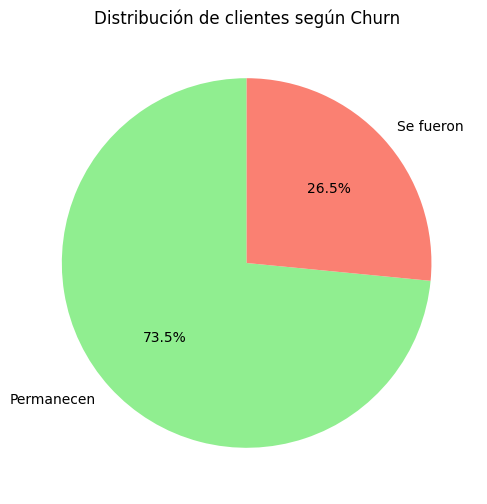

<ipython-input-9-1536833925>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_normalizado, x='Churn', palette=['lightgreen', 'salmon'])


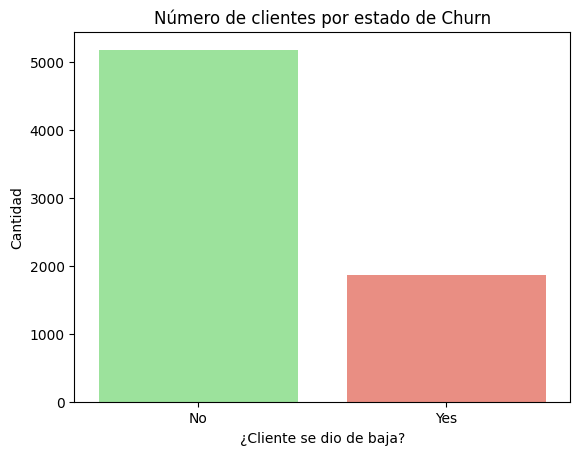

In [ ]:
# Filtrar para conservar solo las filas donde 'Churn' sea 'Yes' o 'No'
df_normalizado = df_normalizado[df_normalizado['Churn'].isin(['Yes', 'No'])].copy()

print(df_normalizado['Churn'].unique())

import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de valores
churn_counts = df_normalizado['Churn'].value_counts()

# Gráfico circular (pie chart)
plt.figure(figsize=(6, 6))
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Permanecen', 'Se fueron'], colors=['lightgreen', 'salmon'])
plt.title('Distribución de clientes según Churn')
plt.ylabel('')
plt.show()

sns.countplot(data=df_normalizado, x='Churn', palette=['lightgreen', 'salmon'])
plt.title('Número de clientes por estado de Churn')
plt.xlabel('¿Cliente se dio de baja?')
plt.ylabel('Cantidad')
plt.show()







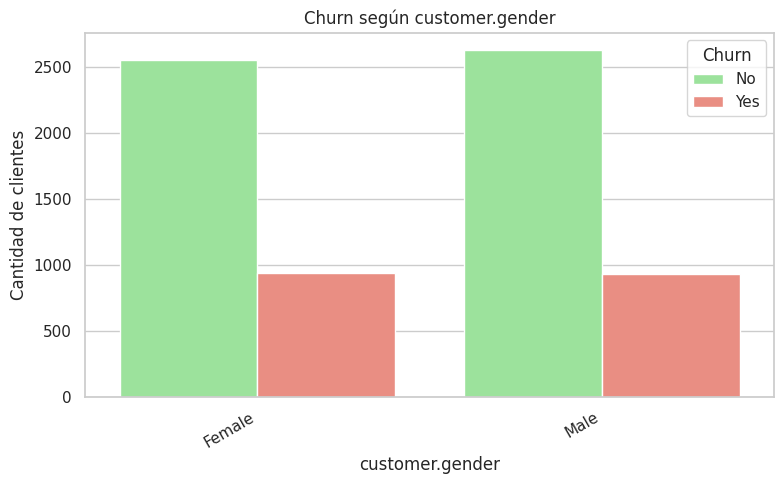

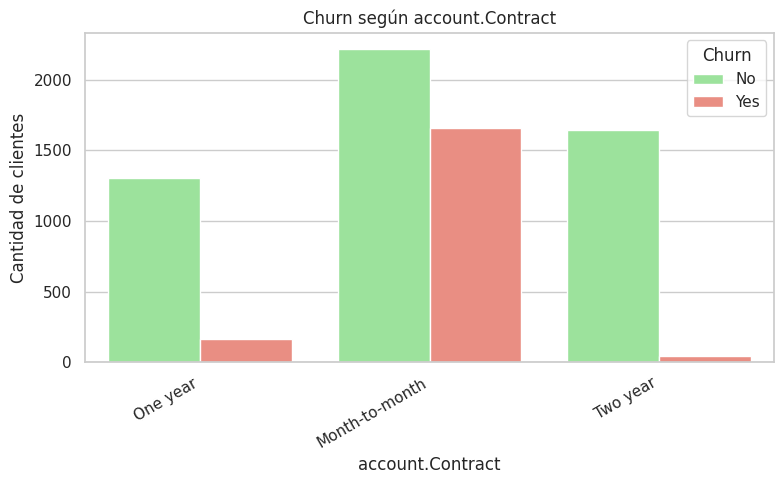

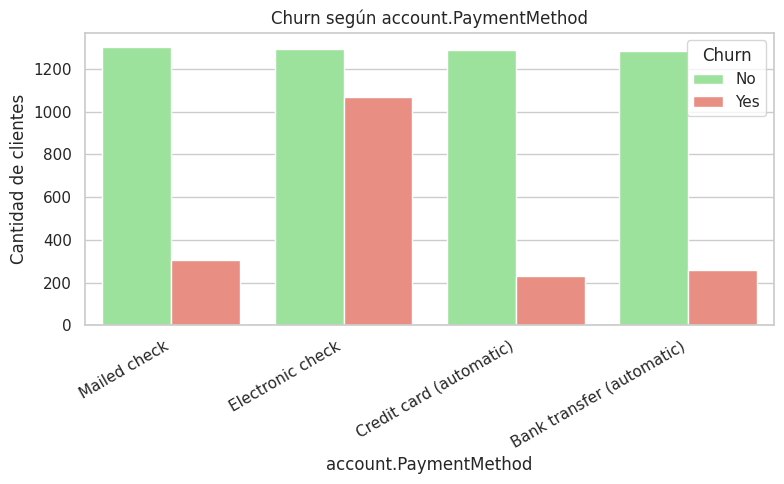

In [ ]:
# Estilo
sns.set(style="whitegrid")

# Lista de variables categóricas a analizar
variables_categoricas = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

# Crear un gráfico para cada variable categórica
for variable in variables_categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_normalizado, x=variable, hue='Churn', palette=['lightgreen', 'salmon'])
    plt.title(f'Churn según {variable}')
    plt.xlabel(variable)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()


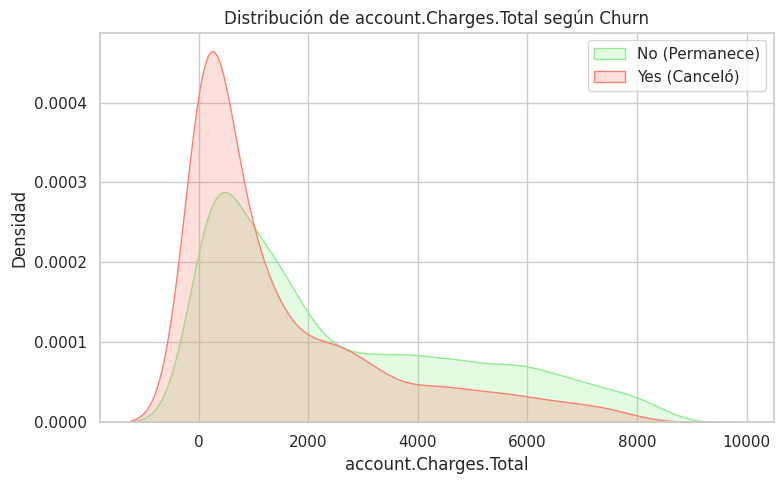

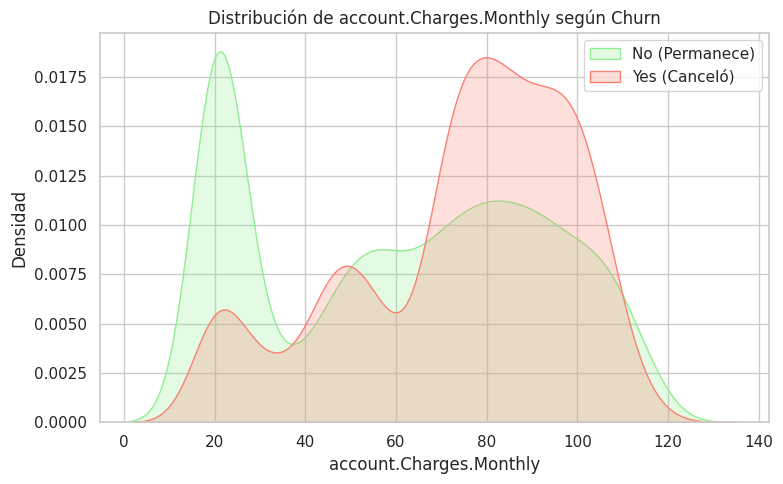

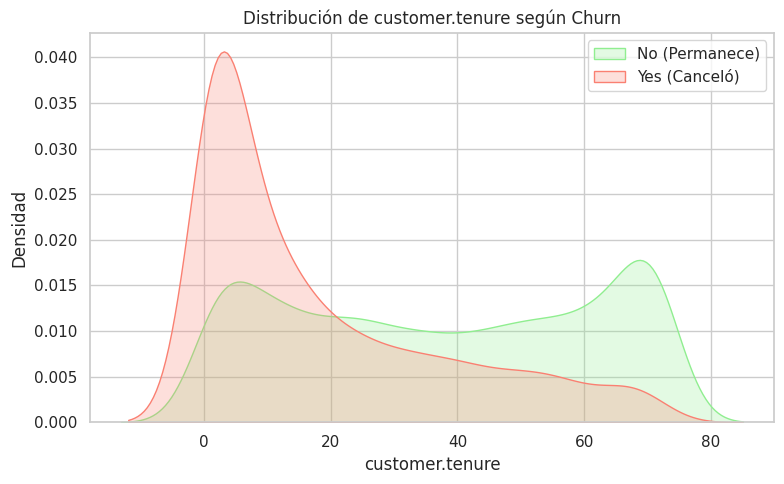

In [ ]:

# Convertir a valores numéricos (si no lo has hecho ya)
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
df_normalizado['account.Charges.Monthly'] = pd.to_numeric(df_normalizado['account.Charges.Monthly'], errors='coerce')
df_normalizado['customer.tenure'] = pd.to_numeric(df_normalizado['customer.tenure'], errors='coerce')


# Variables numéricas relevantes
variables_numericas = ['account.Charges.Total', 'account.Charges.Monthly', 'customer.tenure']

# Crear un gráfico KDE para cada variable
for variable in variables_numericas:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_normalizado[df_normalizado['Churn'] == 'No'], x=variable, label='No (Permanece)', fill=True, color='lightgreen')
    sns.kdeplot(data=df_normalizado[df_normalizado['Churn'] == 'Yes'], x=variable, label='Yes (Canceló)', fill=True, color='salmon')
    plt.title(f'Distribución de {variable} según Churn')
    plt.xlabel(variable)
    plt.ylabel('Densidad')
    plt.legend()
    plt.tight_layout()
    plt.show()
